#  Проект 2. Разведывательный анализ данных

___Цель___ - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска

___Задачи:___
- Провести первичную обработку данных
- Посмотреть на распределение признака для числовых переменных, устранить выбросы
- Оценить количество уникальных значений для номинативных переменных
- По необходимости преобразовать данные
- Провести корреляционный анализ количественных переменных
- Ототбрать не коррелирующие переменные
- Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину
- Сформулировать выводы относительно качества данных и тех переменных, которые не будут использоваться в дальнейшем построении модели


___Описание датасета___ (переменные, которые содержит датасет):

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

# 1. Предварительный осмотр данных

На этом этапе мы взглянем на наши данные, чтобы проверить, всё ли ок

In [586]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter('ignore')
%matplotlib inline


math = pd.read_csv('C:/Users/1311959/Desktop/python/stud_math.xls')

In [587]:
display(math.head(10))
math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Как уже видно из краткой информации датасета, у нас 395 строчек и 30 столбцов, но не каждый столбец заполнен полностью, значит есть пропуски. Чтобы убедиться, построим тепловую карту

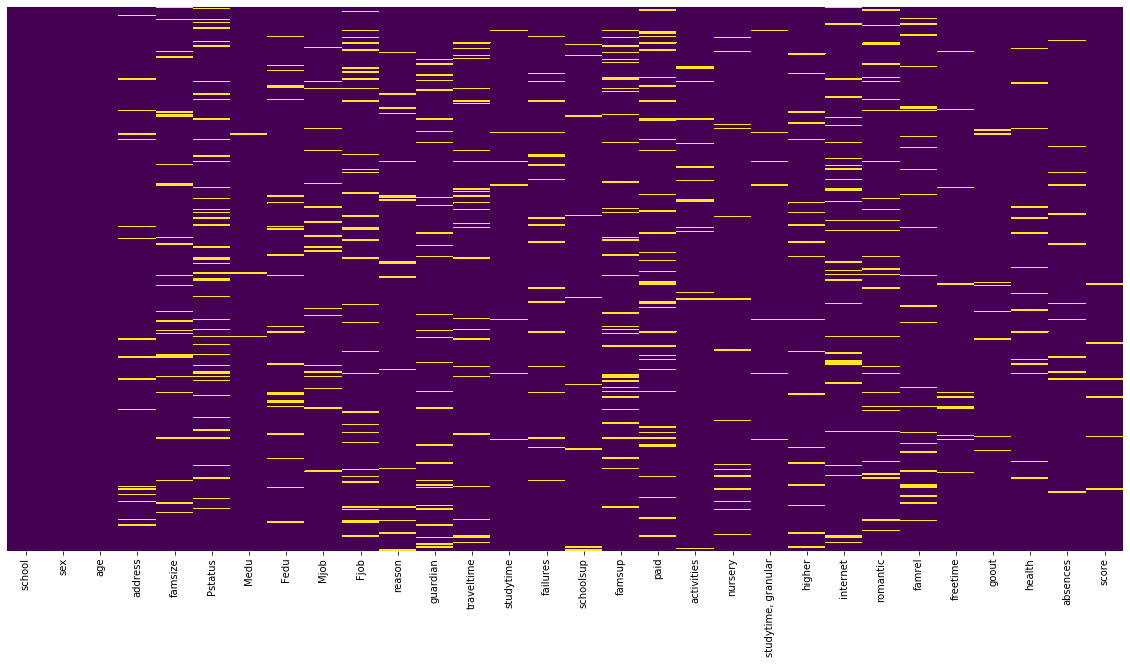

In [588]:
plt.figure(figsize=(20, 10))
sns.heatmap(math.isnull(), cbar=False, yticklabels=False, cmap='viridis')

Из тепловой карты видно, что пропусков прилично. Посмотрим теперь на количество уникальных значений, чтобы убедиться, что данные считались корректно

In [589]:
math.nunique()

school                  2
sex                     2
age                     8
address                 2
famsize                 2
Pstatus                 2
Medu                    5
Fedu                    6
Mjob                    5
Fjob                    5
reason                  4
guardian                3
traveltime              4
studytime               4
failures                4
schoolsup               2
famsup                  2
paid                    2
activities              2
nursery                 2
studytime, granular     4
higher                  2
internet                2
romantic                2
famrel                  6
freetime                5
goout                   5
health                  5
absences               36
score                  18
dtype: int64

Посмотрим на распределение результатов по математике

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

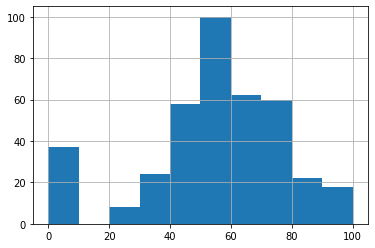

In [590]:
math.score.hist()
math.score.describe()

Достаточно людей присутствуют с 0 баллов за экзамен. Посмотрим на этих ребят

In [591]:
math[math.score == 0].describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,37.000000,36.000000,34.000000,32.000000,37.000000,35.000000,37.000000,34.000000,36.000000,36.000000,35.000000,36.0,37.0
mean,17.054054,2.333333,2.323529,1.500000,1.945946,0.857143,-5.837838,3.823529,3.111111,3.166667,3.657143,0.0,0.0
std,1.311190,1.041976,1.147344,0.718421,0.911225,1.033067,2.733674,1.028992,0.887300,1.341641,1.304807,0.0,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0
25%,16.000000,1.750000,1.000000,1.000000,1.000000,0.000000,-6.000000,3.000000,3.000000,2.000000,3.000000,0.0,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,1.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,0.0,0.0
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.000000,-3.000000,4.750000,4.000000,4.000000,5.000000,0.0,0.0
max,19.000000,4.000000,4.000000,3.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,0.0,0.0


Пропусков у этих студентов нет. Есть желание отнести 0 к выбросу. Чтобы убедиться,взглянем на боксплот

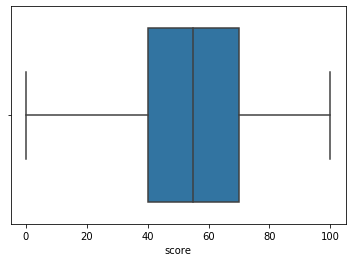

In [592]:
sns.boxplot(x='score', data=math)

Вероятнее всего, что 0 это просто неявка на экзамен. Он может влиять на наш итоговый результат, поэтому просто так удалить их нельзя (нулей достаточно много в данных, почти 10%). Поэтому просто выделим нули в отдельную группу.

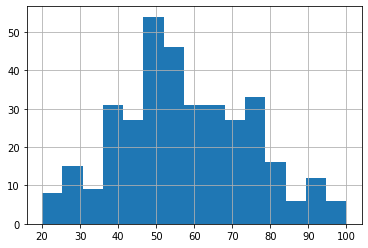

In [593]:
math['zero_result'] = math.score.apply(
    lambda x: None if pd.isnull(x) else 1 if x == 0 else 0)
math_0 = math.score.apply(lambda x: x if x > 0 else np.nan)
math.loc[math['score'] == 0.0, 'score'] = np.nan
math.score.hist(bins=15)

___Вывод:___ Данные считались корректно, но есть пропуски. Нули из исходной модели убрали и выделили в отдельный датасет. Распределение похоже на нормальное, но разброс достаточно большой.

# 2. Предварительный анализ данных в столбцах

На этом этапе посмотрим на:
- влияние различных признаков на целевую переменную и попробуем найти выбросы
- на саму целевую переменную, чтобы отобрать признаки для дальнейшей обработки

In [483]:
# напишем функицю, который отображает столбец и инфу о нём
def get_info(col):

    display(pd.DataFrame(math[col].value_counts().head(10)))
    math.loc[:, [col]].info()

In [484]:
# Проверим столбец studytime и studytime, granular
get_info('studytime')
get_info('studytime, granular')

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime, granular    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


Очень похоже на совершенную мультиколлинеарность между столбцами (2 столбец получается из 1 столбца, умноженного на -3), что приводит к смещению и несостоятельности оценки интересующего нас параметра. К тому же, количество значений у них абсолютно одинаковое. Посмотрим на корреляцию между ними

In [485]:
math['studytime'].corr(math['studytime, granular'])

-0.9999999999999998

Между ними совершенная отрицаительная корреляция, так что можно спокойно дропнуть столбец *'studytime, granular'*

In [486]:
math.drop(['studytime, granular'], inplace=True, axis=1)

In [487]:
# Взглянем теперь на studytime
display(math.loc[:, ['studytime']].head(10))
math.loc[:, ['studytime']].info()
display(pd.DataFrame(math.studytime.value_counts()))

,studytime
0,2.0
1,2.0
2,2.0
3,3.0
4,2.0
5,2.0
6,2.0
7,2.0
8,2.0
9,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


In [488]:
# В данных 7 пропусков. Посмотрим на моду и медиану этого столбца
math.studytime.median()
# мода - наиболее часто встречающееся значение в данных. В нашем случае она тоже 2.
# По итогу, мода и медиана совпадают, поэтому заменяем пропущенные значения на медиану
math.loc[pd.isnull(math['studytime']),
         'studytime'] = math['studytime'].median()
get_info('studytime')

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


___Итог:___ Столбец *studytime* имеет 4 уникальных значения, которые относятся к порядковым переменным. Столбец *studytime, granular* мы убрали, т.к. эта линейная комбинация столбца *studytime*. В данных было 7 пропусков, которые мы заменили медианой

In [489]:
# Посмотрим тебе на столбец про школы
get_info('school')

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
school    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


___Итог:___ Школа содержит бинарные перменные, пропусков в данных нет

In [490]:
# Посмотрим на столбец Fedu
get_info('Fedu')

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    371 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


В данных есть явный выброс (40.0). Вполне возможно, что это опечатка при внесении данных и на самом деле должго быть 4.0. Исправим это

In [491]:
math.loc[math['Fedu'] == 40.0, 'Fedu'] = 4.0
get_info('Fedu')

,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    371 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [492]:
# Аналогично предыдущему пункту, посмотрим на медиану
math.Fedu.median()

2.0

In [493]:
# Можно попробовать заменить пропуски медианой
math.loc[pd.isnull(math['Fedu']), 'Fedu'] = math['Fedu'].median()
get_info('Fedu')

,Fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


___Итог:___ Мы исправили вручную выброс. В данных 5 уникальных данных, относим их к порядковым переменным. Всего у нас было 24 пропуска, которые мы заменили на медианные значения

In [494]:
get_info('Medu')

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Medu    392 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [495]:
# Посмотрим на медиану
math.Medu.median()

3.0

In [496]:
# Заполним эти 3 пропуска медианой
math.loc[pd.isnull(math['Medu']), 'Medu'] = math['Medu'].median()
get_info('Medu')

,Medu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Medu    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


___Итог:___ Столбец Medu имеет 5 различных значений, относим их к порядковым переменным. Всего у нас было 3 пропуска, которые мы заменили медианой

In [497]:
# Посмотрим на столбец Mjob
get_info('Mjob')

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Mjob    376 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [498]:
# Для номинальных переменных уже нельзя заполнять пропуски медианой. Вообще, для таких переменных придумать способ
# заполнения пропусков это отдельное искусство. Попробуем заполнить модой, т.е. значением other
math.loc[pd.isnull(math['Mjob']), 'Mjob'] = 'other'
get_info('Mjob')

,Mjob
other,152
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Mjob    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


___Итог:___ У нас 5 уникальных значений, как в описании, которые относятся к номинальным переменным. Всего у нас было 19 пропусков, которые мы заменили на значение *'other'*, так как он чаще всего встречался

In [499]:
# Рассмотрим столбец Fjob
get_info('Fjob')

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fjob    359 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [500]:
# Попробуем аналогично заполнить пропуски столбцом 'other'
math.loc[pd.isnull(math['Fjob']), 'Fjob'] = 'other'
get_info('Fjob')

,Fjob
other,233
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fjob    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


___Итог:___ Всего у нас 5 значений, которые относим к номинальным переменным. Пропусков у нас было 36, которые мы заменили на *'other'*

In [501]:
# Посмотрим на столбец reason
get_info('reason')

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [502]:
# Тут уже сложнее будет заплнить пропуски, т.к. первые 3 значения встречаются довольно часто, а пропусков 17
# Попробуем всё-таки заполнить модой
math.loc[pd.isnull(math['reason']), 'reason'] = 'course'
get_info('reason')

,reason
course,154
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


___Итог:___ Всего у нас 4 значения, которые относим к номинальным переменным. Пропусков было 17, заменили их на моду

In [503]:
# Посмотрим на столбец guardian
get_info('guardian')

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
guardian    364 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [504]:
# Тут пропусков 31, но слишком много значения mother по сравнению с отсальными
# Есть соблазн заполнить пропуски модой. Так и сделаем
math.loc[pd.isnull(math['guardian']), 'guardian'] = 'mother'
get_info('guardian')

,guardian
mother,281
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
guardian    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


___Итог:___ Всего у нас 3 значения, которые относим к номинальным переменным. Пропусков у нас было 31, которые мы заменили модой

In [505]:
# Посмотрим на столбец traveltime
get_info('traveltime')

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    367 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [506]:
# Хочется заполнить всё медианой, т.к. очевидно, что 1.0 сильно преобладает в выборке, но для формальности
# посчитаем медиану
math.traveltime.median()

1.0

In [507]:
# заполняем модой
math.loc[pd.isnull(math['traveltime']), 'traveltime'] = 1.0
get_info('traveltime')

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


___Итог:___ Четыре уникальных значения, которые мы относим к порядковым переменным. Пропусков у нас было 28, которые мы заполнили модой

In [508]:
# посмотрим на столбец failures
get_info('failures')

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    373 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [509]:
# Заполним также модой
math.loc[pd.isnull(math['failures']), 'failures'] = 0.0
get_info('failures')

,failures
0.0,315
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


___Итог:___ Переменная принимает 4 значения, относим её к порядковым переменныи. Всего у нас было 22 пропуска, которые мы заполнили модой

In [510]:
# посмотрим на столбец famtel
get_info('famrel')

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    368 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


Видим выброс (-1.0). Скорее всего произошёл человеческий фактор и вместо 1.0 ввели -1.0. Заменим эту ошибку

In [511]:
math.loc[math['famrel'] == -1.0, 'famrel'] = 1.0
get_info('famrel')

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    368 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [512]:
# Заполним пропуски модой
math.loc[pd.isnull(math['famrel']), 'famrel'] = 4.0
get_info('famrel')

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


___Итог:___ Всего у нас 5 уникальных значений, относим их к порядковым переменным. У нас был 1 выброс, мы его устранили. В данных было 27 пропусков, мы заполнили их модой

In [513]:
# Посмотрим на столбец freetime
get_info('freetime')

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    384 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [514]:
# Посмотрим на медиану
math.freetime.median()

3.0

In [515]:
# Заполним пропуски медаиной
math.loc[pd.isnull(math['freetime']), 'freetime'] = math['freetime'].median()
get_info('freetime')

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


___Итог:___ Всего у нас 5 уникальных значений, относим их к порядковым переменным. В данных 11 пропусков, позже решим, как будем от них избавляться

In [516]:
# Проверим столбец goout
get_info('goout')

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
goout    387 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [517]:
# Пропусков у нас мало, заполним всё медианой
math.loc[pd.isnull(math['goout']), 'goout'] = math['goout'].median()
get_info('goout')

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
goout    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


___Итог:___ Всего у нас 5 уникальных значений, относим их к порядковым переменным. В данных было 8 пропусков, заполнили их медианой

In [518]:
# Посмотрим столбец health
get_info('health')

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
health    380 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [519]:
# Аналогично заполним медианой
math.loc[pd.isnull(math['health']), 'health'] = math['health'].median()
get_info('health')

,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
health    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


___Итог:___ Всего у нас 5 уникальных значений, относим их к порядковым переменным. В данных было 15 пропусков, заменили их медианой

In [520]:
# Посмотрим на числовое распределение age
get_info('age')

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
age    395 non-null int64
dtypes: int64(1)
memory usage: 3.2 KB


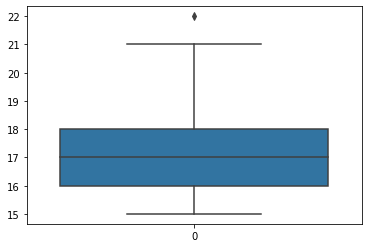

In [609]:
# Посмотрим на боксплот
math.age.value_counts()
sns.boxplot(data=math.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


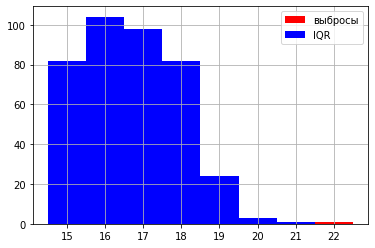

In [323]:
# Боксплот предлагает дропнуть 22 как выброс. Проведём более подробный анализ границ выбросов
median = math.age.median()
IQR = math.age.quantile(0.75) - math.age.quantile(0.25)
perc25 = math.age.quantile(0.25)
perc75 = math.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


math.age.loc[math.age <= 22].hist(bins=8,
                                  range=(14.5, 22.5),
                                  color='red',
                                  label='выбросы')

math.age.loc[math.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=8,
                                                                        range=(
                                                                            14.5, 22.5),
                                                                        color='blue',
                                                                        label='IQR')

plt.legend()

,age
16.0,104
17.0,98
15.0,82
18.0,82
19.0,24
20.0,3
21.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
age    394 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


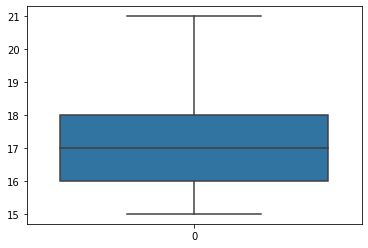

In [325]:
# Получается, возраст 22 действительно выброс. Уберём его из данных
math.loc[math['age'] == 22.0, 'age'] = np.nan
get_info('age')
math.age.describe()
sns.boxplot(data=math.age)

Теперь выбросов нет. Пропусков также нет.

___Итог:___ В данных нет пропусков, относим его к числовым переменным. В данных присутсвовал 1 выброс, который му удалили. Судя по графику, большинство учеников имеет возраст *16-17* лет. Старше 17 лет уже не так часто встречаются, что логично, т.к. обычно больше 11 лет в школе не учатся, существование таких учеников можно объяснить несклоькими способами:
- Они пошли в школу поздно (в 8 лет)
- В его стране больше 11 лет учебы (в некоторых странах 12 лет учебы)
- Его оставляли на 2 год из-за неуспеваемости

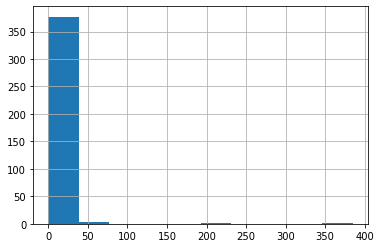

In [326]:
# Посмотрим на числовой ряд absences
math.absences.hist()

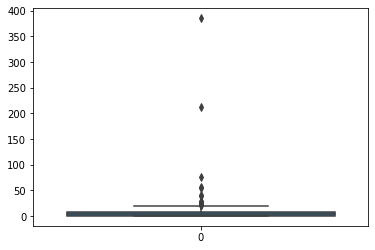

In [327]:
sns.boxplot(data=math.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 7.0, IQR: 7.0,  Границы выбросов: [-10.5, 17.5].


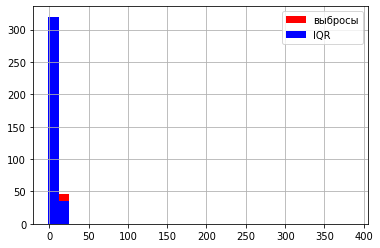

In [331]:
# Судя по всему, выбросов довольно многовато. Сделаем подробный анализсграницы выбросов
median = math.absences.median()
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


math.absences.loc[math.absences <= 385].hist(bins=30,
                                             range=(-1, 386),
                                             color='red',
                                             label='выбросы')

math.absences.loc[math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=30,
                                                                                  range=(-1,
                                                                                         386),
                                                                                  color='blue',
                                                                                  label='IQR')

plt.legend()

In [ ]:
# Посмотрим на описательную статистику пропусков
math.absences.describe()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    366 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


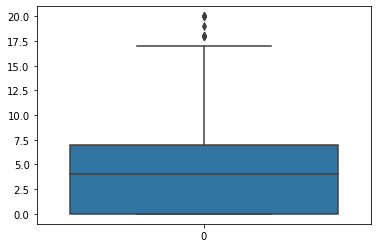

In [332]:
# Очень большая разница между 75% квартилем и максимумом, а также среднее и дисперсия сильно рзличаются.
# Избавимся от выбросов
math.loc[math['absences'] > 20.0, 'absences'] = np.nan
get_info('absences')
math.absences.describe()
sns.boxplot(data=math.absences)

In [527]:
# Заполним пропуски медианой
math.loc[pd.isnull(math['absences']), 'absences'] = math['absences'].median()
get_info('absences')

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


___Итог:___ Распределение скошено вправо, т.е большинство пропусков находятся в диапазоне от 0 до 7. Пропусков было 12, заменили медианой. Данный относим к порядковым переменным

У нас остались бинарные переменные. Здесь я в инете нашёл способ обработать их быстрее, поэтому я воспользуюсь им для экономии времени

In [521]:
replacement_list = []
list_of_binary_columns = ['sex', 'address', 'famsize', 'Pstatus',
                          'schoolsup', 'famsup', 'paid', 'activities',
                          'nursery', 'higher', 'internet', 'romantic']

In [522]:
for elem in list_of_binary_columns:
    a = math[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        replacement_list.append([a[0], a[1]])
    else:
        print(
            f"со столбцом {elem} произошла ошибка. Уникальные значения: math[elem].values")
replacement_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [523]:
replacement_list[5] = ['yes', 'no']
replacement_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [524]:
math[list_of_binary_columns].describe()

,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,378,368,350,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,F,U,GT3,T,no,yes,no,yes,yes,yes,yes,no
freq,208,295,261,314,335,219,200,195,300,356,305,240


In [526]:
# Посчитаем количество пропущенных значений по столбцам

395 - math[list_of_binary_columns].describe().T['count']

sex            0
address       17
famsize       27
Pstatus       45
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
Name: count, dtype: object

In [547]:
# Заполним все пропуски медаиной
get_info('address')

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
address    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [556]:
# У меня есть подозрение, что между типом адреса студента и время пути до школы существует связь
# Если студент из сельской местности, то ему дольше идти до школы, а городскому меньше. Посмотрим, так ли это
math.groupby(['address']).traveltime.mean()

address
R    1.775281
U    1.300654
Name: traveltime, dtype: float64

In [551]:
# Видно, что для сельского мальчика путь дольше, чем для городского. Заполним тогда так:
# Если traveltime == 1 или None, адрес заполняем значение U, в остальных случая R
math.loc[pd.isnull(math['address']), 'address'] \
    = math.traveltime.apply(lambda x: 'U' if pd.isnull(x) else 'U' if x == 1 else 'R')
get_info('address')

,address
U,306
R,89


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
address    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


___Итог:___ Данные обработались корректно, пропуков было 17. Заполнили их в зависимости от длительности пути до школы

In [559]:
# Посмотрим на столбец famsize
get_info('famsize')

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsize    368 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [560]:
# Здесь уже сложно найти взаимосвязь с другими параметрами, поэтому просто заменим пропуски модой
math.loc[pd.isnull(math['famsize']), 'famsize'] = 'GT3'
get_info('famsize')

,famsize
GT3,288
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsize    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


___Итог:___ Пропусков было 27, мы заполнили их модой

In [561]:
# Взгянем на столбец Pstatus
get_info('Pstatus')

,Pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    350 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [566]:
# Подавляющее число родителей в выборке живут вместе, поэтому заполним модой
math.loc[pd.isnull(math['Pstatus']), 'Pstatus'] = 'T'
get_info('Pstatus')

,Pstatus
T,359
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


___Итог:___ Было 45 пропусков, мы заполнили их модой

In [567]:
# Взглянем на оставшиеся столбцы
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    display(pd.DataFrame(math[col].value_counts()))
    math.loc[:, [col]].info()

,schoolsup
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    386 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


,famsup
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsup    356 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


,paid
no,200
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
paid    355 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


,activities
yes,195
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
activities    381 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


,nursery
yes,300
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
nursery    379 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


,higher
yes,356
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
higher    375 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


,internet
yes,305
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
internet    361 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


,romantic
no,240
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
romantic    364 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [603]:
# Вообще на предварительном этапе сложно выдеять, как заполнять пропуски в бинарных переменных
# По-хорошему нужно учитывать, как переменные влияют на целевую перемнную, как взаимодействуют друг с другом и т.д.
# Но модели полноценного у нас нет, к тому же у меня пока мало опыта в этом, поэтому заполним модой
math.loc[pd.isnull(math['schoolsup']), 'schoolsup'] = 'no'
math.loc[pd.isnull(math['famsup']), 'famsup'] = 'yes'
math.loc[pd.isnull(math['paid']), 'paid'] = 'no'
math.loc[pd.isnull(math['activities']), 'activities'] = 'yes'
math.loc[pd.isnull(math['nursery']), 'nursery'] = 'yes'
math.loc[pd.isnull(math['higher']), 'higher'] = 'yes'
math.loc[pd.isnull(math['internet']), 'internet'] = 'yes'
math.loc[pd.isnull(math['romantic']), 'romantic'] = 'no'

___Итог:___  Пропуски в оставшихся бинарных переменных мы заполнили модой 

# 3. Корреляционный анализ

На этом этапе мы:
- Проведём корреляционный анализ, чтобы выяснить, какие переменные следует отбросить
- Проведём детальный анализ для различных переменных, чтобы понять, какие переменные значимо влияют на нашу целевую пеоеменную

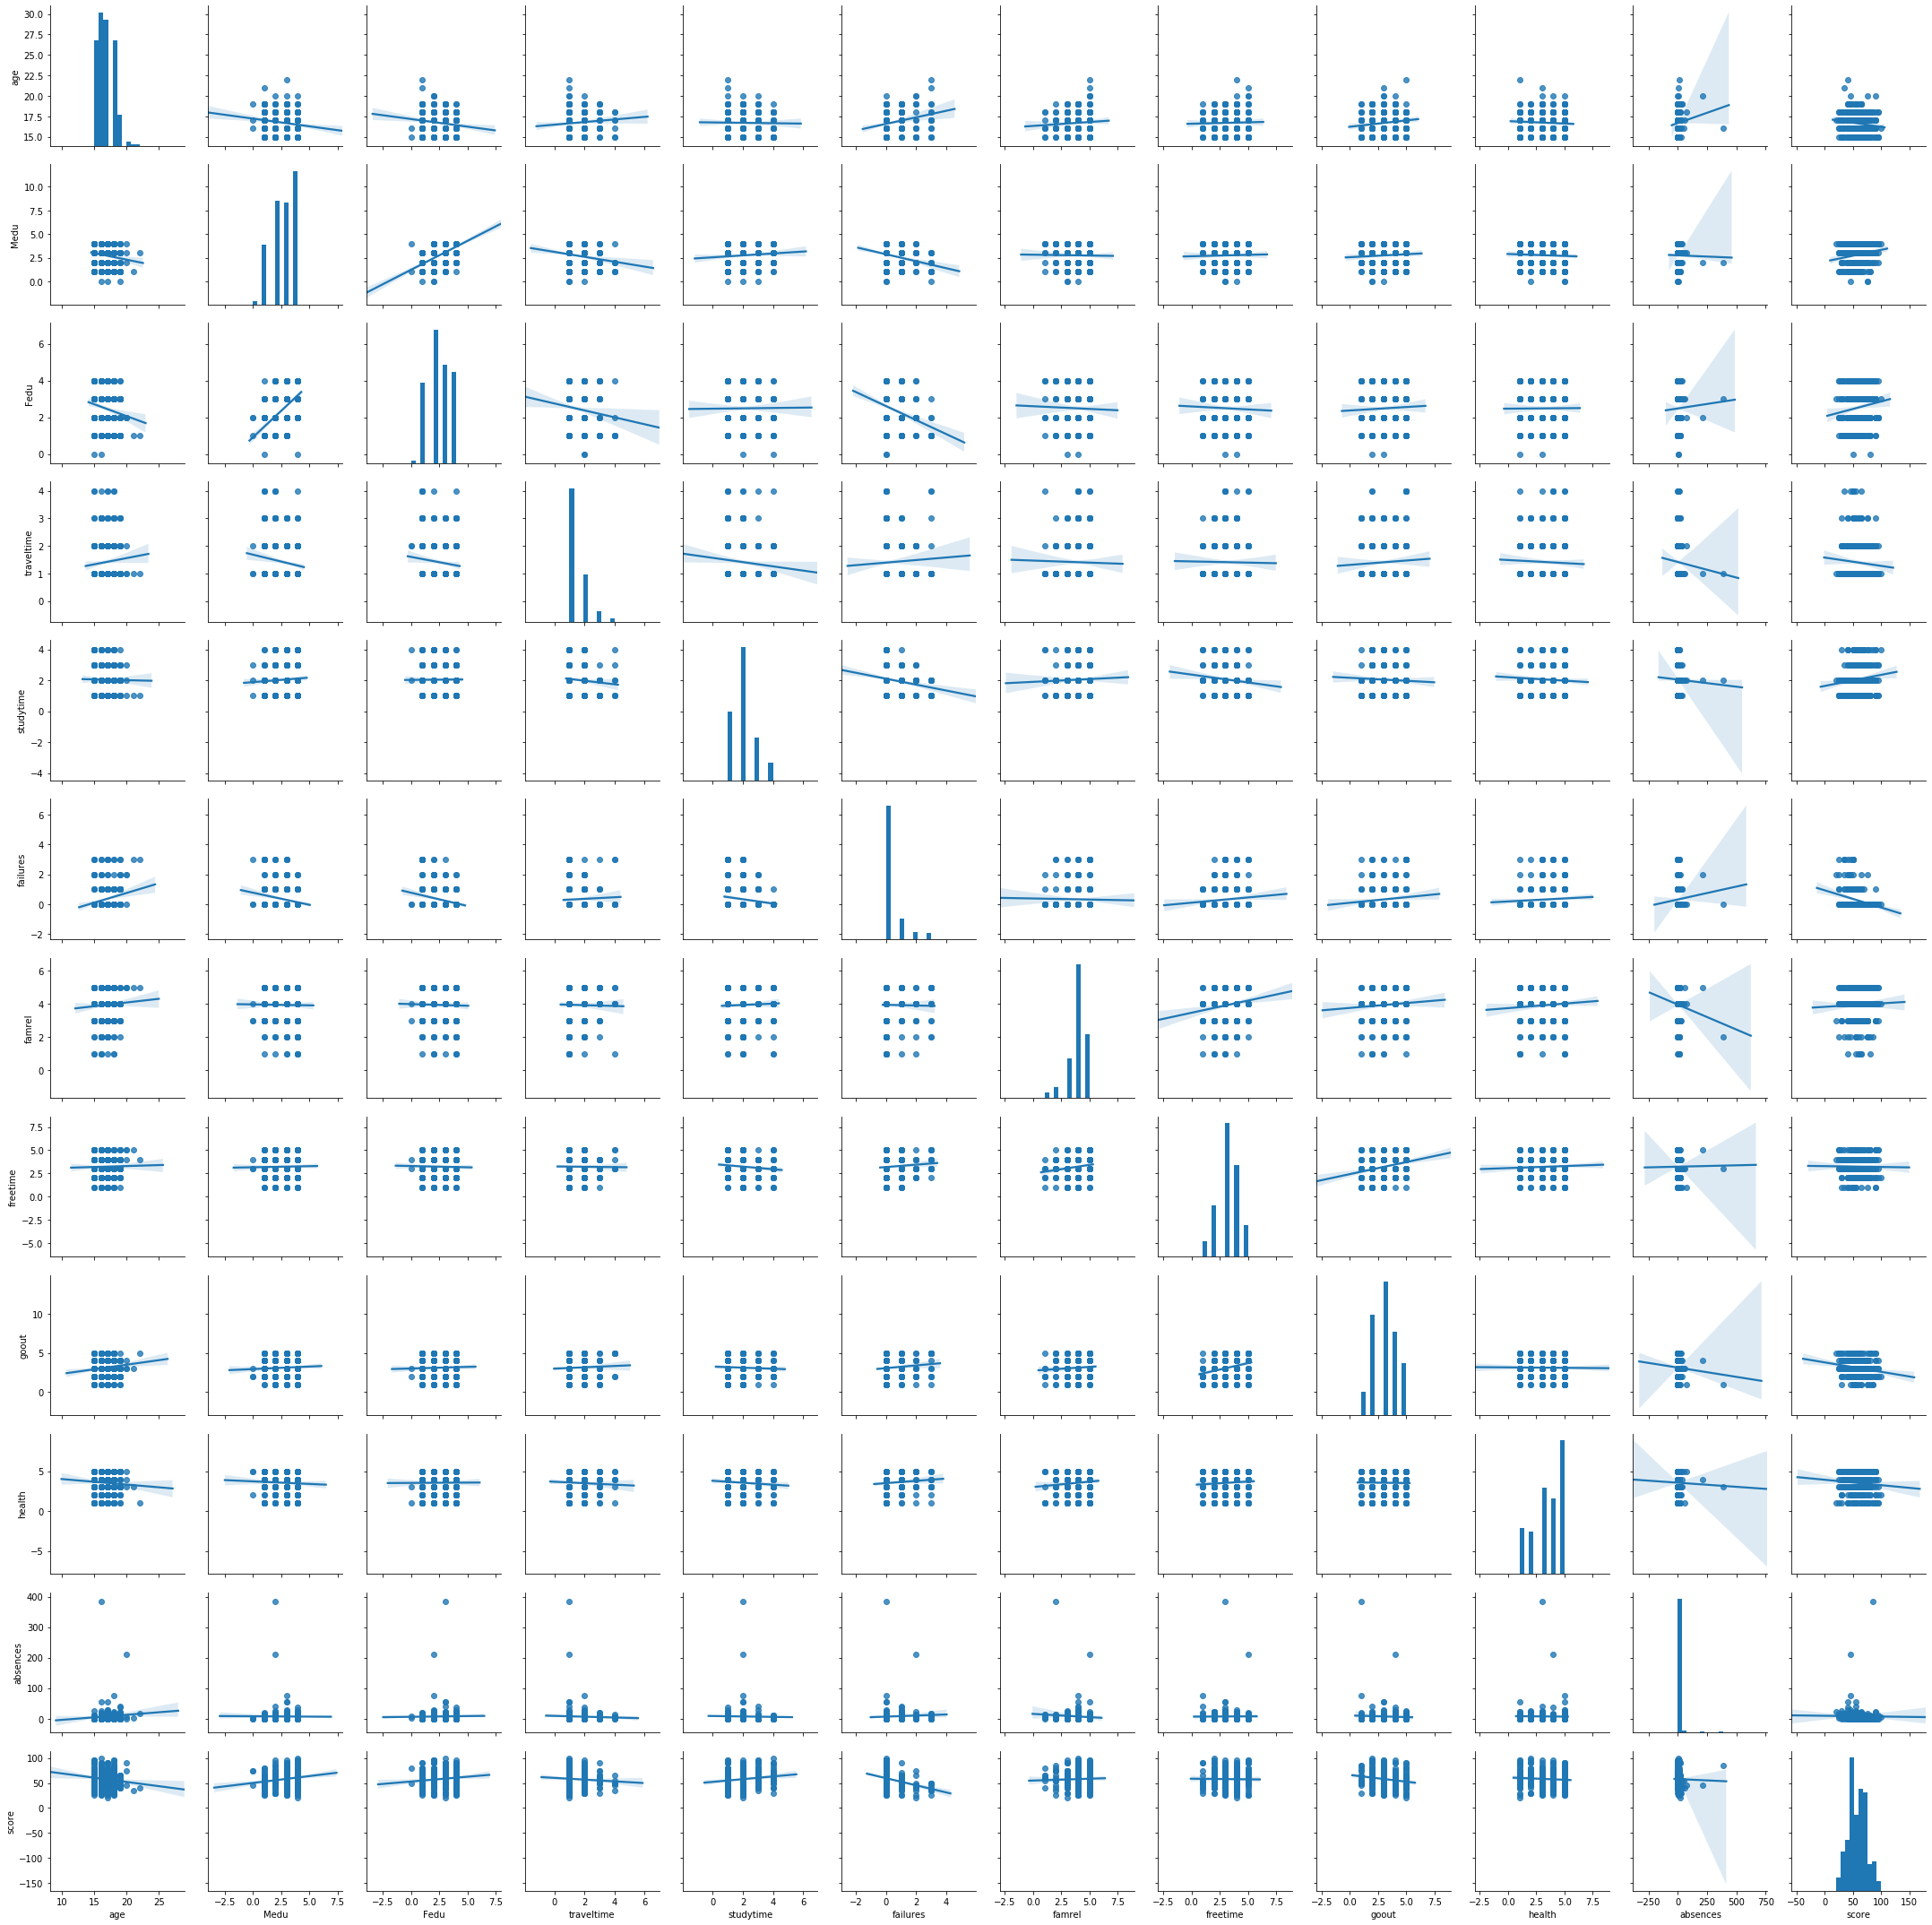

In [570]:
sns.pairplot(math, kind='reg')

Визуально очень сильной корреляции между какими-либо переменными не наблюдается, посмотрим на таблицу корредяций для наглядноти.

In [571]:
cor = math.corr()
cor

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.154781,0.084755,-0.015355,0.228081,0.065250,0.026443,0.134069,-0.063892,0.091531,-0.131542
Medu,-0.161375,1.000000,0.593116,-0.160877,0.077050,-0.245110,-0.013853,0.026210,0.063361,-0.050991,-0.010979,0.184533
Fedu,-0.154781,0.593116,1.000000,-0.120629,0.007754,-0.260690,-0.024077,-0.029868,0.039084,0.006132,0.021345,0.125396
traveltime,0.084755,-0.160877,-0.120629,1.000000,-0.094637,0.049670,-0.019040,-0.012496,0.051775,-0.044842,-0.038511,-0.072435
studytime,-0.015355,0.077050,0.007754,-0.094637,1.000000,-0.166598,0.037638,-0.119014,-0.051090,-0.073674,-0.025619,0.139605
failures,0.228081,-0.245110,-0.260690,0.049670,-0.166598,1.000000,-0.017230,0.094826,0.113649,0.075849,0.055245,-0.286925
famrel,0.065250,-0.013853,-0.024077,-0.019040,0.037638,-0.017230,1.000000,0.165324,0.074217,0.085947,-0.079959,0.039036
freetime,0.026443,0.026210,-0.029868,-0.012496,-0.119014,0.094826,0.165324,1.000000,0.292305,0.060557,0.006943,-0.014731
goout,0.134069,0.063361,0.039084,0.051775,-0.051090,0.113649,0.074217,0.292305,1.000000,-0.014274,-0.049745,-0.179913
health,-0.063892,-0.050991,0.006132,-0.044842,-0.073674,0.075849,0.085947,0.060557,-0.014274,1.000000,-0.017368,-0.078860


Можно судить об сильной корреляции, если связь между ними по модулю превышает 0.7. Проверим, есть ли такие

In [572]:
cor[cor > abs(0.7)]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fedu,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveltime,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studytime,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
failures,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
famrel,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
freetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
goout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


Значит, оставляем все критерии. Сильной корреляции нет ни у кого. Далее построим боксплоты

In [573]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 3))
    sns.boxplot(x=column, y='score',
                data=math.loc[math.loc[:, column].isin(
                    math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

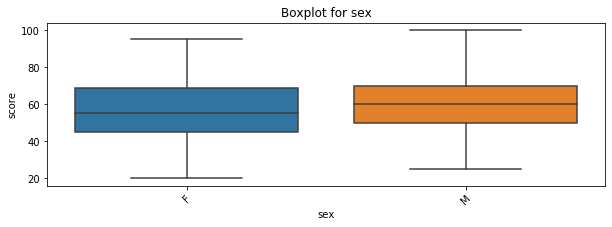

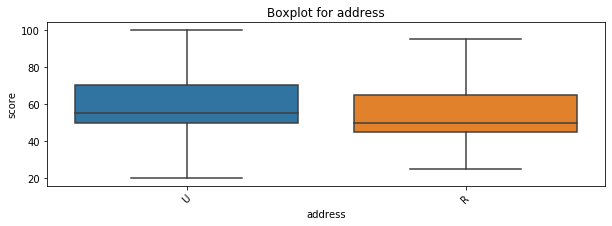

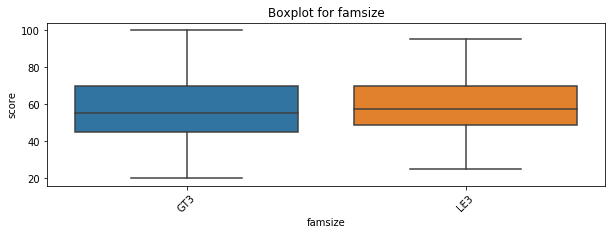

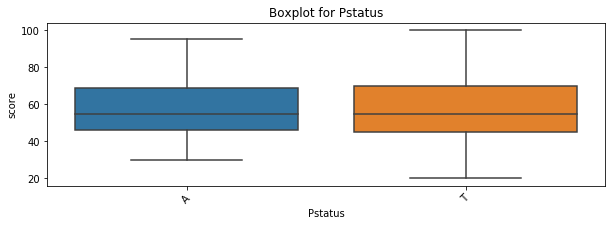

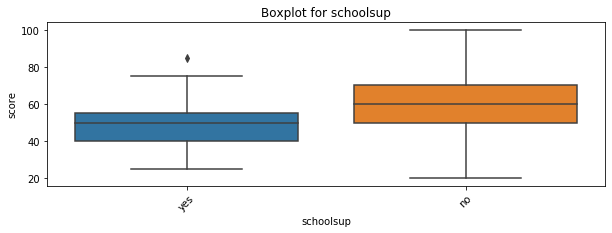

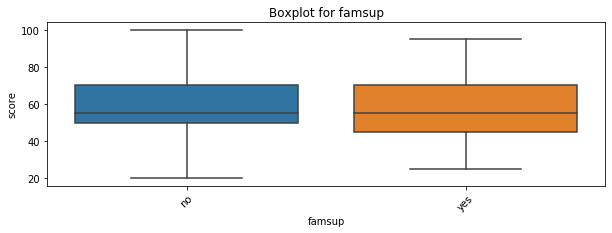

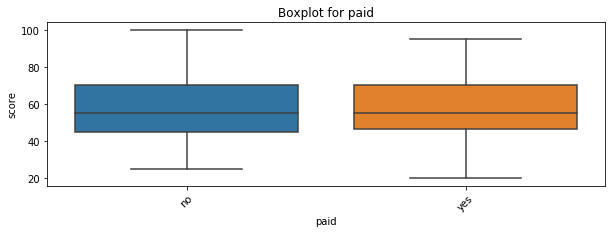

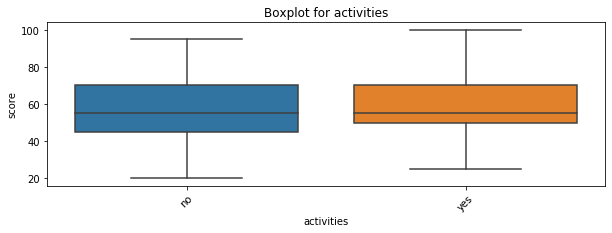

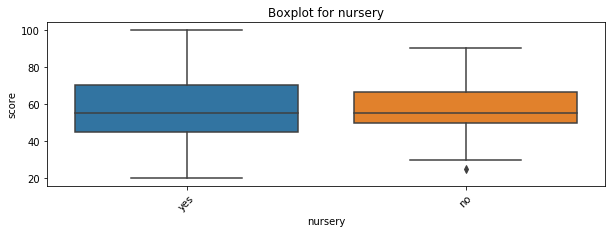

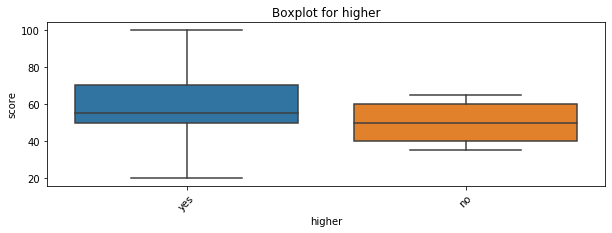

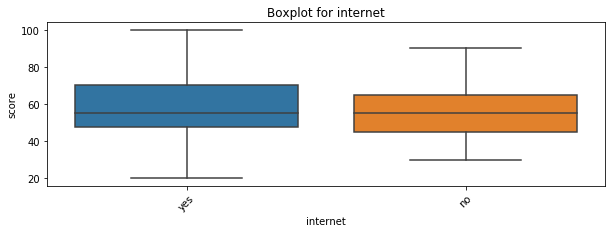

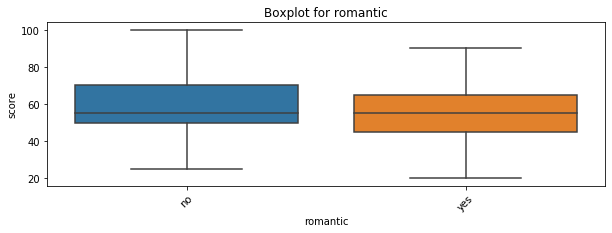

In [576]:
for col in list_of_binary_columns:
    get_boxplot(col)

Визуально очень сильно отличаются боксплоты у столбцов *schoolsup*, *nursery*, *higher*. Проведём тест стьюдента, чтобы убедиться

In [577]:
# Но сначало построим боксплоты для порядковых переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.boxplot(x=column, y='score',
                data=math.loc[math.loc[:, column].isin(
                    math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

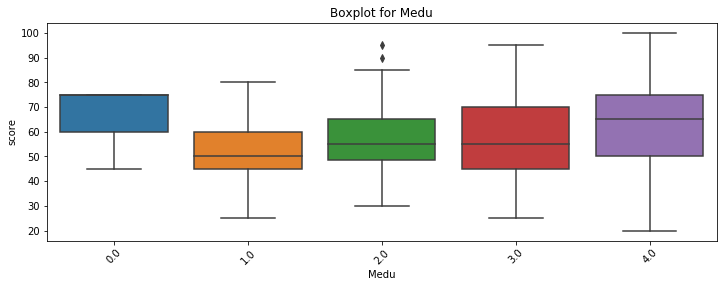

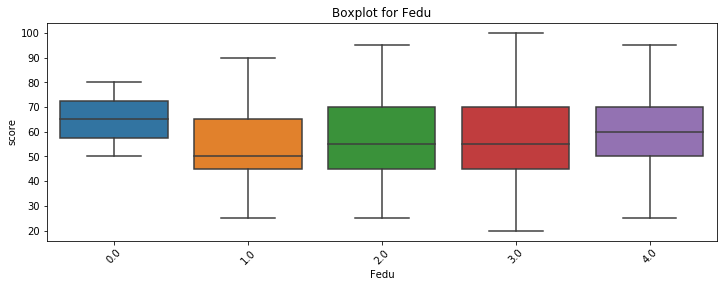

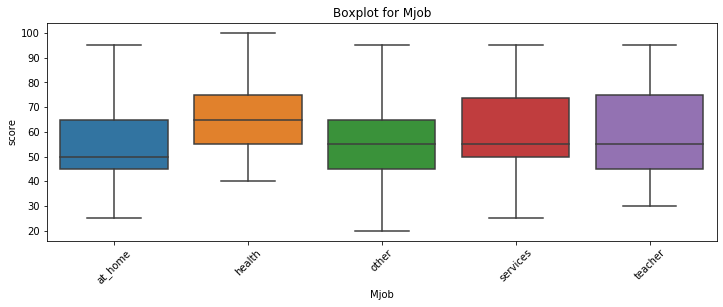

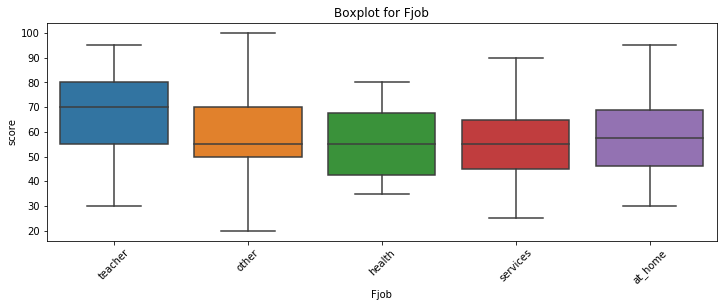

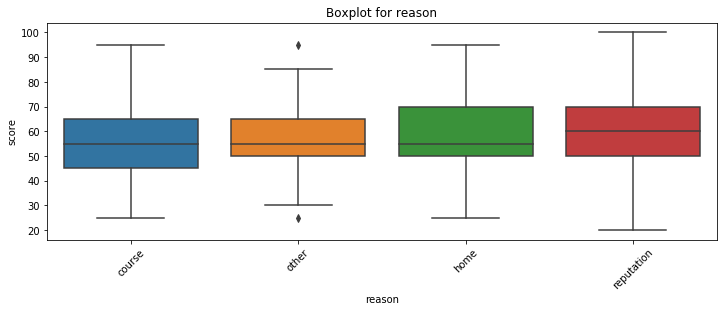

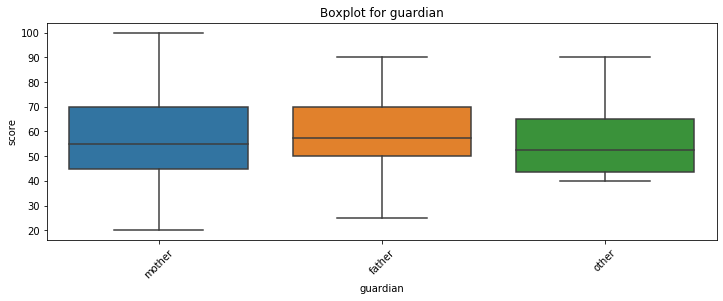

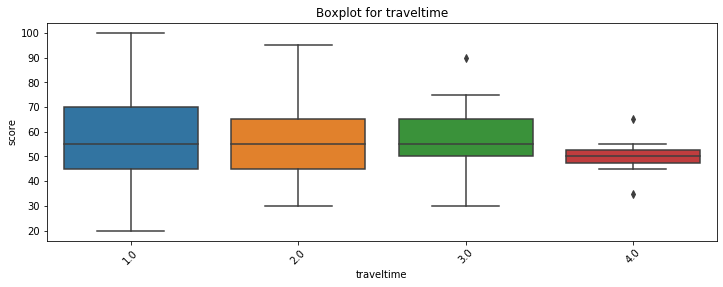

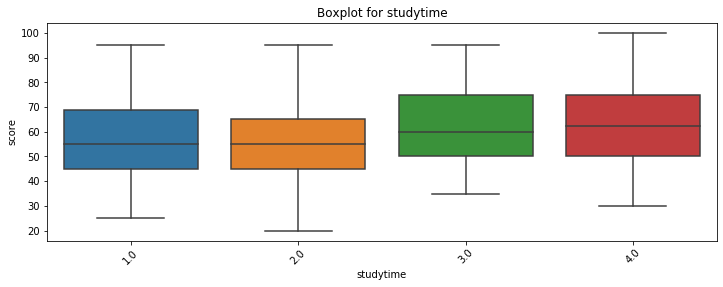

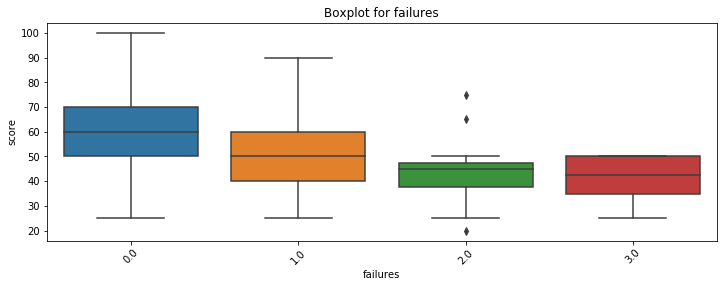

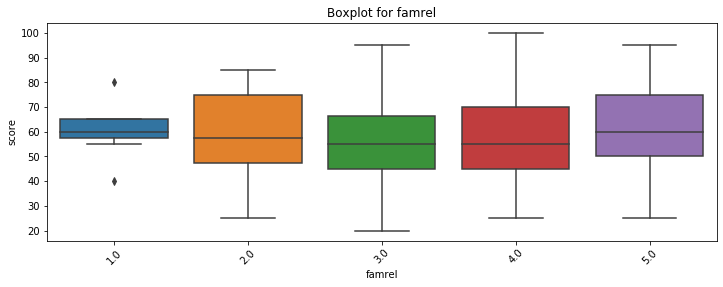

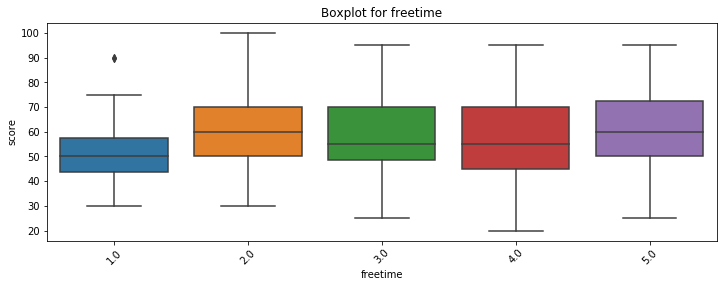

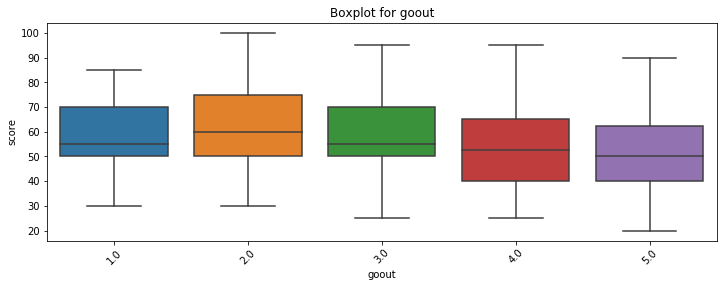

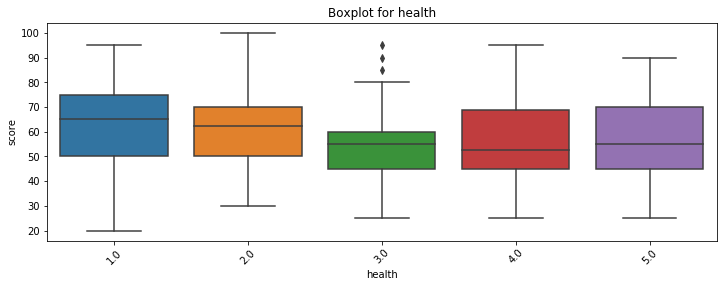

In [578]:
list_of_rating_columns = ('Medu', 'Fedu', 'Mjob', 'Fjob',
                          'reason', 'guardian', 'traveltime', 'studytime',
                          'failures', 'famrel', 'freetime', 'goout', 'health')
for col in list_of_rating_columns:
    get_boxplot(col)

Визуально у многих переменных распределения сильно отличаются. Проведём же тест Стьдента, чтобы всё узнать.

In [579]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'].dropna(),
                          math.loc[math.loc[:, column] == comb[1], 'score'].dropna()).pvalue
        if ttest <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [580]:
list_of_all_columns = []
list_of_all_columns.extend(list_of_binary_columns)
list_of_all_columns.extend(list_of_rating_columns)
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки address
!!!Найдены статистически значимые различия для колонки schoolsup
!!!Найдены статистически значимые различия для колонки Medu
!!!Найдены статистически значимые различия для колонки Fedu
!!!Найдены статистически значимые различия для колонки Mjob
!!!Найдены статистически значимые различия для колонки Fjob
!!!Найдены статистически значимые различия для колонки studytime
!!!Найдены статистически значимые различия для колонки failures
!!!Найдены статистически значимые различия для колонки goout


___Итог___: Значимо отличаются 9 параметров: address, schoolsup, Medu, Fedu, Mjob, Fjob, studytime, failures, goout. Оставим эти переменные в датасете для дальнейшего построения модели.



In [ ]:
# Посмотрим теперь, какие переменные влияют на параметр math_0
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(math.loc[math.loc[:, column] == comb[0], 'zero_result'].dropna(),
                          math.loc[math.loc[:, column] == comb[1], 'zero_result'].dropna()).pvalue
        if ttest <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [595]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки paid
!!!Найдены статистически значимые различия для колонки higher
!!!Найдены статистически значимые различия для колонки romantic
!!!Найдены статистически значимые различия для колонки failures


___Итог:___ на параметр zero_result значимо влияют 4 параметра: *paid*, *higher*, *romantic* и *failures*

# Этап 4. Готовим данные для модели

На предыдущих этапах мы нашли 13 параметров в сумме, влияющие на 2 целевые переменные:
- ___age___, ___absences___, ___address___, ___Medu___, ___Fedu___, ___Mjob___, ___Fjob___, ___studytime___, ___failures___, ___school_sup___, ___go_out___ - влияют на *score*.
- ___Medu___, ___failures___, ___guardian___, ___paid___, ___higher___, ___romantic___ - влияют на *zero_result*.

In [605]:
math_model = math.loc[:, ['age', 'absences', 'address', 'schoolsup',
                          'Medu', 'Fedu', 'Mjob', 'Fjob',
                          'studytime', 'failures', 'goout', 'paid',
                          'higher', 'romantic', 'score', 'zero_result']]

In [606]:
math_model.head()

,age,absences,address,schoolsup,Medu,Fedu,Mjob,Fjob,studytime,failures,goout,paid,higher,romantic,score,zero_result
0,18,6.0,U,yes,4.0,4.0,at_home,teacher,2.0,0.0,4.0,no,yes,no,30.0,0.0
1,17,4.0,U,no,1.0,1.0,at_home,other,2.0,0.0,3.0,no,yes,no,30.0,0.0
2,15,10.0,U,yes,1.0,1.0,at_home,other,2.0,3.0,2.0,no,yes,no,50.0,0.0
3,15,2.0,U,no,4.0,2.0,health,NaN,3.0,0.0,2.0,yes,yes,yes,75.0,0.0
4,16,4.0,U,no,3.0,3.0,other,other,2.0,0.0,2.0,yes,yes,no,50.0,0.0


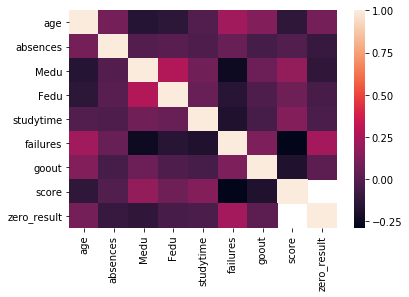

In [608]:
# Посмотрим на корреляцию параметров
sns.heatmap(math_model.corr())

In [616]:
# Построим также таблцу корреляции переменных с score
pd.DataFrame(math_model.corr().iloc[-2, :-2])

,score
age,-0.131542
absences,-0.014039
Medu,0.186477
Fedu,0.069842
studytime,0.142055
failures,-0.289377
goout,-0.182286


___Итог:___ Сильной корреляции между переменными нет, данные подходят для анализа

# Выводы:

Мы провели EDA для построения будущей модели. В результате предварительного анализа мы пришли к сдежующим выводам:

- Всего у нас было 395 строк и 30 столбцов, в которых было достаточно пропусков. Заполнили мы их преимущественно медианой и модой
- Стообец *studytime, granular* был линейной комбинацией studytime, поэтому мы его убрали
- В некоторых столбцах были выбросы, которые мы устранили
- В столбце score было много нулевых результатов, поэтому мы выделили их в отдельный столбец zrro_result
- Корреляционный анализ показал следующие результаты:

    * отрицательная корреляция параметра age и score может говорить о том, что чем выше возраст тем ниже score
    * отрицательная корреляция параметра failures и score может говорить о том, что чем больше неудач по другим предметам тем ниже score
    * отрицательная корреляция параметра goout и score может говорить о том, что чем больше ученик проводит времени с друзьями тем ниже score
    * положительная корреляция по парамметру Medu, Fedu и score говорит о том, что чем выше лучше образование матери или отца, тем выше score
    * положительная корреляция по парамметру studytime и score говорит о том, что чем больше ученик готовится к экзамену, тем выше score
    * Самое интересное, что существует отрицательная корреляция между schoolsup и score. Интересно узнать, почему. Возможно, что дети больше расслабляются, когда им всё на блюдечке
- Мы выбрали cамые важные параметры кот дальнейшем для построения модели 14, это: age, absences, address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout, paid, higher, romantic.